In [38]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

students_df = pd.read_csv('students_performance.csv')
# print(students_df.head(5))

In [39]:
end_str = '\n' + '=' * 50 + '\n'

print(students_df.info(), end=end_str)

#строки столбцы
# print(students_df.shape, end=end_str)

# print(students_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [40]:
#Работа со столбцами переименовать в Русские и стиль питона
column_translations = {
    'gender': 'пол',
    'race/ethnicity': 'раса',
    'parental level of education': 'образование_родителей',
    'lunch': 'обед',
    'test preparation course': 'курс_подготовки_к_тесту',
    'math score': 'балл_по_математике',
    'reading score': 'балл_по_чтению',
    'writing score': 'балл_по_письму'
}

#Английские с подчеркиваниями
# col = students_df.columns.str.replace(' ', '_').str.lower()
students_df = students_df.rename(columns=column_translations)
students_df

,пол,раса,образование_родителей,обед,курс_подготовки_к_тесту,балл_по_математике,балл_по_чтению,балл_по_письму
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [41]:
#Очистка от дубликатов и пропусков
if students_df.duplicated().any():
    print(f'🔁 Найдено {students_df.duplicated().sum()} дубликатов.')
    df = students_df.drop_duplicates().reset_index(drop=True)
    print('✅ Дубликаты удалены.')
else:
    print('👌 Дубликатов не найдено.')

print(students_df.isna().sum())


👌 Дубликатов не найдено.
пол                        0
раса                       0
образование_родителей      0
обед                       0
курс_подготовки_к_тесту    0
балл_по_математике         0
балл_по_чтению             0
балл_по_письму             0
dtype: int64


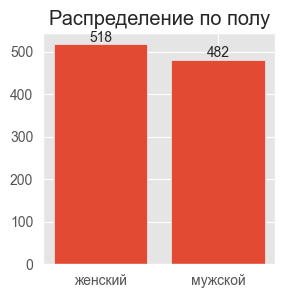

In [79]:
#Визуализирую количество мальчиков / девочек
# print(gender_ser.unique())

replace_col = {'male': 'мужской', 'female': 'женский'}

ob_values = students_df['пол'].replace(replace_col).value_counts()
# print(ob_values)
plt.figure(figsize=(3, 3))
plt.bar(ob_values.index, ob_values.values)
for i, v in enumerate(ob_values.values):
    plt.text(i, v + 5, str(v), ha='center')
plt.title('Распределение по полу')
plt.show()


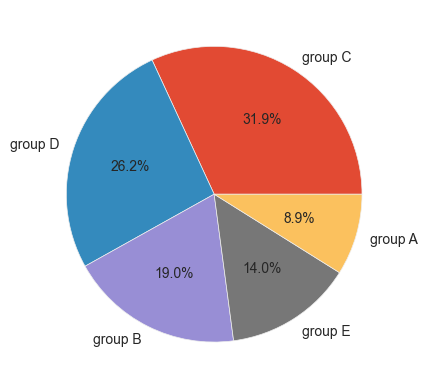

In [48]:
#Соотношение рас в процентах
race = students_df['раса'].value_counts()
# print(race)

plt.pie(race.values, labels=race.index, autopct='%1.1f%%')
plt.show()


In [71]:
#Различия в среднем балле по всем предметам между этническими группами

# Средние баллы по расам
def get_round_mean(lst: df.Series) -> int:
    return lst.mean().round(2)

mean_scores = students_df.groupby('раса').agg(
    математика=('балл_по_математике', get_round_mean),
    чтение=('балл_по_чтению', get_round_mean),
    письмо=('балл_по_письму', get_round_mean)
)

print(mean_scores)
# Среднее по расам (Series)

# Среднее по всем расам и предметам (средний по больнице)
mean_scores_full = mean_scores.mean(axis=1).mean().round(2)
print(f'\nСредняя общая оценка по школе = {mean_scores_full}\n')



         математика  чтение  письмо
раса                               
group A       61.63   64.67   62.67
group B       63.45   67.35   65.60
group C       64.46   69.10   67.83
group D       67.36   70.03   70.15
group E       73.82   73.03   71.41

Средняя общая оценка по школе = 67.5



[<BarContainer object of 5 artists>, <BarContainer object of 5 artists>, <BarContainer object of 5 artists>]


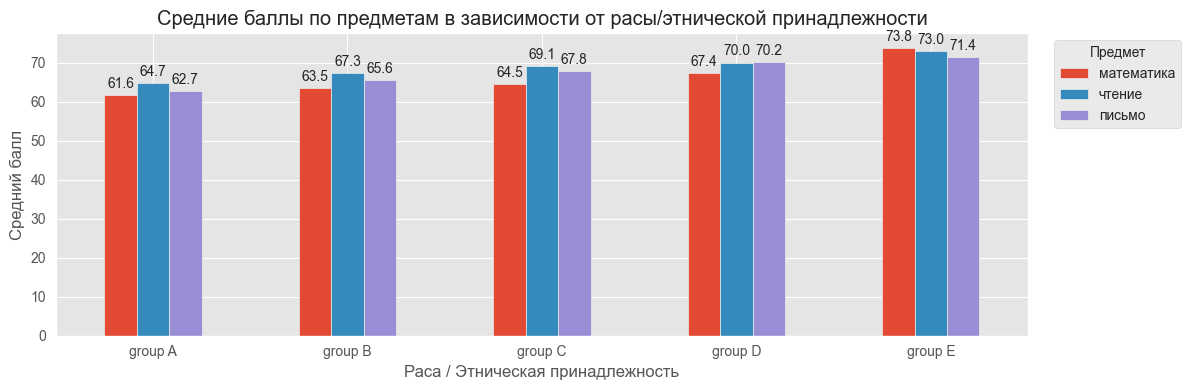

In [89]:
# Построим grouped bar chart
ax = mean_scores.plot(kind='bar', figsize=(12, 4))
print(ax.containers)

# Добавляем подписи
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3, fontsize=10)  # padding — отступ от столбца

# Настройки
plt.title('Средние баллы по предметам в зависимости от расы/этнической принадлежности')
plt.xlabel('Раса / Этническая принадлежность')
plt.ylabel('Средний балл')
plt.xticks(rotation=0)  # чтобы подписи были горизонтально
# Легенда справа снаружи
plt.legend(title='Предмет', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [61]:
#Различия в среднем балле по всем предметам между этническими группами
plt.bar(mean_scores['race/ethnicity'], mean_scores['mean_scores'])

for i, v in enumerate(mean_scores['mean_scores']):
    plt.text(i, v + 1, str(v), ha='center')

plt.ylabel('Средний балл')
plt.title('Средний балл по группам')
plt.show()

#средние оценки group E выше всех. group A -самые низкие

KeyError: 'раса'

gender
female    63.63
male      68.73
Name: math_score, dtype: float64


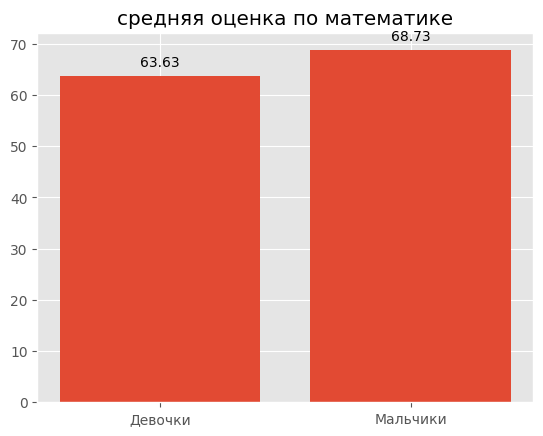

In [11]:
#Гипотеза 1: средние оценки по математике различаются у мальчиков и девочек.
mean_math_score_gender = students_df.groupby('gender')['math_score'].mean().round(2)
print(mean_math_score_gender)
mean_math_score_gender = mean_math_score_gender.rename({
    'male': 'Мальчики',
    'female': 'Девочки'
})
plt.bar(mean_math_score_gender.index, mean_math_score_gender.values)

for i, v in enumerate(mean_math_score_gender.values):
    plt.text(i, v + 2, str(v), ha='center')

plt.title('средняя оценка по математике')
plt.show()

#средние оценки по математике у мальчиков выше чем у девочек

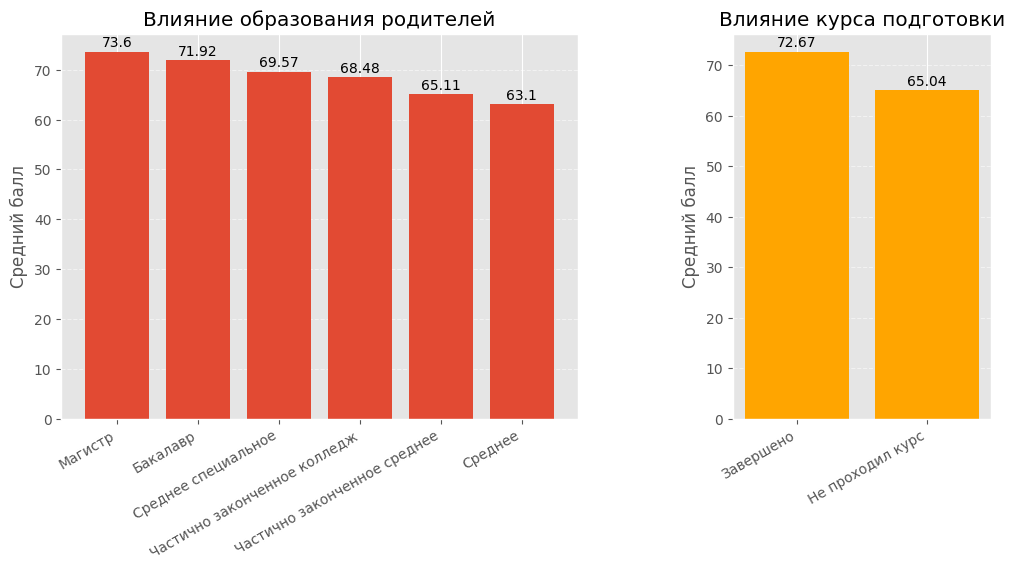

In [18]:
#Влияние курса подготовки и Влияние образования родителей на общую оценку

#группе детей с подготовкой посчитать среднее 3х колонок
students_df['full_mean_score'] = students_df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
# print(students_df)

#дети с подготовкой
parents_res = students_df.groupby('parental_level_of_education')['full_mean_score'].mean().round(2)
parents_res.sort_values(ascending=False, inplace=True)

# Словарь соответствий
edu_map = {
    "master's degree": "Магистр",
    "bachelor's degree": "Бакалавр",
    "associate's degree": "Среднее специальное",
    "some college": "Частично законченное колледж",
    "some high school": "Частично законченное среднее",
    "high school": "Среднее"
}

#с образованными родителями
preparation_res = students_df.groupby('test_preparation_course')['full_mean_score'].mean().round(2)
# Переименуем индексы
parents_res.index = parents_res.index.map(edu_map)

# создаём фигуру и два графика в строку
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), width_ratios=[2, 1])
# width_ratios — задаёт относительную ширину: левый в 2 раза шире правого

# --- Левый график ---
ax1.bar(range(len(parents_res)), parents_res.values, tick_label=parents_res.index)
for i, v in enumerate(parents_res.values):
    ax1.text(i, v + 1, str(v), ha='center')

ax1.set_ylabel('Средний балл')
ax1.set_xticklabels(parents_res.index, rotation=30, ha='right')  # можно убрать, так как tick_label уже передан
ax1.grid(axis='y', linestyle='--', alpha=0.5)
ax1.set_title('Влияние образования родителей')

# --- Правый график ---
prep_map = {
    "completed": "Завершено",
    "none": "Не проходил курс"
}
preparation_res.index = preparation_res.index.map(prep_map)

ax2.bar(range(len(preparation_res)), preparation_res.values, tick_label=preparation_res.index, color='orange')

for i, v in enumerate(preparation_res.values):
    ax2.text(i, v + 1, str(v), ha='center')

ax2.set_ylabel('Средний балл')
ax2.set_xticklabels(preparation_res.index, rotation=30, ha='right')  # тоже можно убрать
ax2.grid(axis='y', linestyle='--', alpha=0.5)
ax2.set_title('Влияние курса подготовки')

plt.subplots_adjust(wspace=0.4)
plt.show()

#Чем выше образование родителей, тем выше средние баллы ребёнка.
#Те, кто прошёл курс подготовки (test preparation course = completed), имеют более высокие оценки (по всем предметам).